In [82]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import gdown
from IPython.display import display, HTML

In [83]:
dados = pd.read_csv('/content/dados1.csv')
dados.head()

,ID_Cliente,Cancelamento,Gênero,Idoso,Possui_Companheiro,Possui_Dependentes,Meses_de_Contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,...,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Forma_Pagamento,Valor_Mensal,Valor_Total,tempo_estimado_meses,Conta_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,9.044207,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,9.055092,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,3.800406,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,12.631122,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,3.187128,2.796667


In [84]:
# Calcular correlação apenas entre colunas numéricas
dados_numericos = dados.select_dtypes(include=['number', 'bool'])
correlacao = dados_numericos.corr().abs()

# Pegar pares com alta correlação
pares_correlacionados = [
    (col1, col2)
    for col1 in correlacao.columns
    for col2 in correlacao.columns
    if col1 != col2 and correlacao.loc[col1, col2] > 0.95
]

print(" PARES DE COLUNAS COM CORRELAÇÃO:")
print('-'*41)
for col1, col2 in pares_correlacionados:
    print(f"{col1} ------ {col2}")

 PARES DE COLUNAS COM CORRELAÇÃO:
-----------------------------------------
Meses_de_Contrato ------ tempo_estimado_meses
Valor_Mensal ------ Conta_Diarias
tempo_estimado_meses ------ Meses_de_Contrato
Conta_Diarias ------ Valor_Mensal


In [85]:

# Remover as colunas com alta correlação
dados = dados.drop(['ID_Cliente', 'tempo_estimado_meses', 'Conta_Diarias', 'Valor_Total'], axis=1)

# Remover registros onde o valor é 'Não informado'
dados = dados[dados['Cancelamento'] != 'Não informado']


dados.head()

,Cancelamento,Gênero,Idoso,Possui_Companheiro,Possui_Dependentes,Meses_de_Contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,Seguranca_Online,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Forma_Pagamento,Valor_Mensal
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9


In [86]:
# Para saber os valores únicos por coluna e quantidade.
for col in dados.select_dtypes(include='object').columns:
    titulo = f"  {col.upper()}"
    display(HTML(titulo))
    display(dados[col].value_counts(dropna=False).head(3).to_frame(name='Frequência'))
    print("-" * 35)

,Frequência
Cancelamento,
No,5163
Yes,1869


-----------------------------------


,Frequência
Gênero,
Male,3549
Female,3483


-----------------------------------


,Frequência
Possui_Companheiro,
No,3639
Yes,3393


-----------------------------------


,Frequência
Possui_Dependentes,
No,4933
Yes,2099


-----------------------------------


,Frequência
Telefone_Ativo,
Yes,6352
No,680


-----------------------------------


,Frequência
Multiplas_Linhas,
No,3385
Yes,2967
No phone service,680


-----------------------------------


,Frequência
Tipo_Internet,
Fiber optic,3096
DSL,2416
No,1520


-----------------------------------


,Frequência
Seguranca_Online,
No,3497
Yes,2015
No internet service,1520


-----------------------------------


,Frequência
Backup_Online,
No,3087
Yes,2425
No internet service,1520


-----------------------------------


,Frequência
Protecao_Dispositivo,
No,3094
Yes,2418
No internet service,1520


-----------------------------------


,Frequência
Suporte_Tecnico,
No,3472
Yes,2040
No internet service,1520


-----------------------------------


,Frequência
Streaming_TV,
No,2809
Yes,2703
No internet service,1520


-----------------------------------


,Frequência
Streaming_Filmes,
No,2781
Yes,2731
No internet service,1520


-----------------------------------


,Frequência
Tipo_Contrato,
Month-to-month,3875
Two year,1685
One year,1472


-----------------------------------


,Frequência
Fatura_Digital,
Yes,4168
No,2864


-----------------------------------


,Frequência
Forma_Pagamento,
Electronic check,2365
Mailed check,1604
Bank transfer (automatic),1542


-----------------------------------


In [87]:

# Passo 1: Mapear os valores para binário
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    dados = dados.replace({'Yes': 1, 'No': 0})
    dados = dados.replace({'Female': 1, 'Male': 0})
    dados = dados.replace({'True': 1, 'False': 0})



In [88]:
# Passo 2: Identificar colunas que têm só 0 e 1
binarias = [col for col in dados.columns if set(dados[col].dropna().unique()).issubset({0, 1})]

# Passo 3: Converter essas colunas para booleano
dados[binarias] = dados[binarias].astype(bool)

dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7255
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cancelamento          7032 non-null   bool   
 1   Gênero                7032 non-null   bool   
 2   Idoso                 7032 non-null   bool   
 3   Possui_Companheiro    7032 non-null   bool   
 4   Possui_Dependentes    7032 non-null   bool   
 5   Meses_de_Contrato     7032 non-null   int64  
 6   Telefone_Ativo        7032 non-null   bool   
 7   Multiplas_Linhas      7032 non-null   object 
 8   Tipo_Internet         7032 non-null   object 
 9   Seguranca_Online      7032 non-null   object 
 10  Backup_Online         7032 non-null   object 
 11  Protecao_Dispositivo  7032 non-null   object 
 12  Suporte_Tecnico       7032 non-null   object 
 13  Streaming_TV          7032 non-null   object 
 14  Streaming_Filmes      7032 non-null   object 
 15  Tipo_Contrato         7032

In [89]:
# Passo 4: One-hot encoding para todas as colunas categóricas multiclasse
dados = pd.get_dummies(dados, drop_first=True)



In [90]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7255
Data columns (total 30 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Cancelamento                              7032 non-null   bool   
 1   Gênero                                    7032 non-null   bool   
 2   Idoso                                     7032 non-null   bool   
 3   Possui_Companheiro                        7032 non-null   bool   
 4   Possui_Dependentes                        7032 non-null   bool   
 5   Meses_de_Contrato                         7032 non-null   int64  
 6   Telefone_Ativo                            7032 non-null   bool   
 7   Fatura_Digital                            7032 non-null   bool   
 8   Valor_Mensal                              7032 non-null   float64
 9   Multiplas_Linhas_1                        7032 non-null   bool   
 10  Multiplas_Linhas_No phone service        

In [91]:
# Passo 5: Calcular novamente a correlação apenas entre colunas numéricas
dados_numericos = dados.select_dtypes(include=['number', 'bool'])
correlacao = dados_numericos.corr().abs()

# Pegar pares com alta correlação
pares_correlacionados = [
    (col1, col2)
    for col1 in correlacao.columns
    for col2 in correlacao.columns
    if col1 != col2 and correlacao.loc[col1, col2] > 0.95
]

print(" COLUNAS COM ALTA CORRELAÇÃO:\n\n")

for col1, col2 in pares_correlacionados:
    print(f"{col1}  -------->  {col2}\n")

 COLUNAS COM ALTA CORRELAÇÃO:


Telefone_Ativo  -------->  Multiplas_Linhas_No phone service

Multiplas_Linhas_No phone service  -------->  Telefone_Ativo

Seguranca_Online_No internet service  -------->  Backup_Online_No internet service

Seguranca_Online_No internet service  -------->  Protecao_Dispositivo_No internet service

Seguranca_Online_No internet service  -------->  Suporte_Tecnico_No internet service

Seguranca_Online_No internet service  -------->  Streaming_TV_No internet service

Seguranca_Online_No internet service  -------->  Streaming_Filmes_No internet service

Backup_Online_No internet service  -------->  Seguranca_Online_No internet service

Backup_Online_No internet service  -------->  Protecao_Dispositivo_No internet service

Backup_Online_No internet service  -------->  Suporte_Tecnico_No internet service

Backup_Online_No internet service  -------->  Streaming_TV_No internet service

Backup_Online_No internet service  -------->  Streaming_Filmes_No internet ser

In [92]:
# Passo 6: Remover colunas com alta correlação:
dados = dados.drop([ 'Multiplas_Linhas_No phone service',
    'Backup_Online_No internet service',
    'Protecao_Dispositivo_No internet service',
    'Suporte_Tecnico_No internet service',
    'Streaming_TV_No internet service',
    'Streaming_Filmes_No internet service'], axis=1)

# Remover registros onde o valor é 'Não informado'
dados = dados[dados['Cancelamento'] != 'Não informado']


dados

,Cancelamento,Gênero,Idoso,Possui_Companheiro,Possui_Dependentes,Meses_de_Contrato,Telefone_Ativo,Fatura_Digital,Valor_Mensal,Multiplas_Linhas_1,...,Backup_Online_1,Protecao_Dispositivo_1,Suporte_Tecnico_1,Streaming_TV_1,Streaming_Filmes_1,Tipo_Contrato_One year,Tipo_Contrato_Two year,Forma_Pagamento_Credit card (automatic),Forma_Pagamento_Electronic check,Forma_Pagamento_Mailed check
0,False,True,False,True,True,9,True,True,65.60,False,...,True,False,True,True,False,True,False,False,False,True
1,False,False,False,False,False,9,True,False,59.90,True,...,False,False,False,False,True,False,False,False,False,True
2,True,False,False,False,False,4,True,True,73.90,False,...,False,True,False,False,False,False,False,False,True,False
3,True,False,True,True,False,13,True,True,98.00,False,...,True,True,False,True,True,False,False,False,True,False
4,True,True,True,True,False,3,True,True,83.90,False,...,False,False,True,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,False,True,False,False,False,13,True,False,55.15,False,...,False,False,True,False,False,True,False,False,False,True
7252,True,False,False,True,False,22,True,True,85.10,True,...,False,False,False,False,True,False,False,False,True,False
7253,False,False,False,False,False,2,True,True,50.30,False,...,True,False,False,False,False,False,False,False,False,True
7254,False,False,False,True,True,67,True,False,67.85,False,...,False,True,True,False,True,False,True,False,False,True


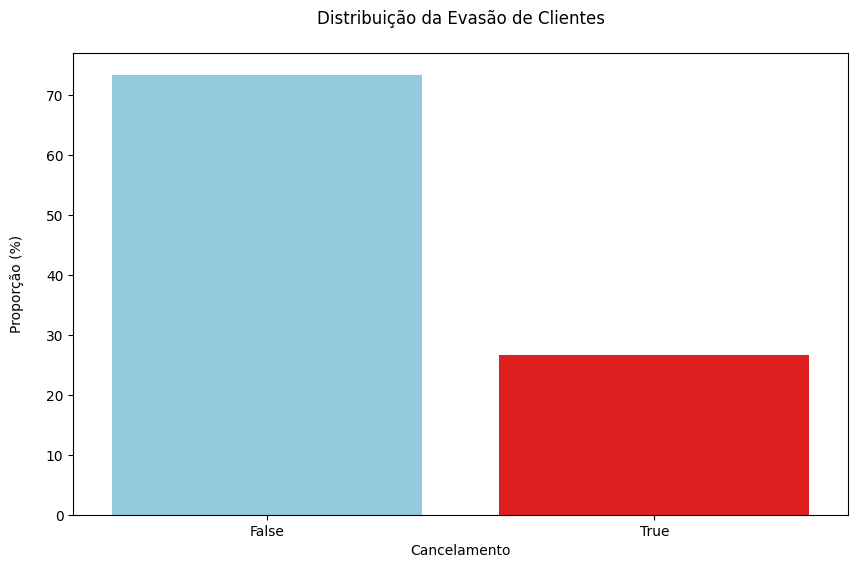


 FREQUENCIA ABSOLUTA:

Cancelamento
False    5163
True     1869
Name: count, dtype: int64
-

 PROPORÇÃO (%):

Cancelamento
False    73.421502
True     26.578498
Name: proportion, dtype: float64
-



In [93]:
# Frequência absoluta e relativa da coluna Cancelamento
frequencia = dados['Cancelamento'].value_counts()
proporcao = dados['Cancelamento'].value_counts(normalize=True) * 100

# Visualizar com gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=proporcao.index, y=proporcao.values, hue=proporcao.index, palette=['skyblue', 'red'], legend=False)
plt.ylabel('Proporção (%)\n')
plt.title('Distribuição da Evasão de Clientes\n')
plt.show()

# Exibir os resultados
print("\n FREQUENCIA ABSOLUTA:\n")

print(frequencia)
print("-\n" * 1)
print(" PROPORÇÃO (%):\n")

print(proporcao)
print("-\n")


In [94]:
# Separar features(X) e target(y)
X = dados.drop('Cancelamento', axis=1)
y = dados['Cancelamento']


In [95]:
# SMOTE (Synthetic Minority Over-sampling Technique)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("DISTRIBUIÇÃO APÓS SMOTE:\n")

print(pd.Series(y_res).value_counts())

DISTRIBUIÇÃO APÓS SMOTE:

Cancelamento
False    5163
True     5163
Name: count, dtype: int64


In [96]:
# Oversampling com RandomOverSampler (Duplica registros da classe minoritária)

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

print("DISTRIBUIÇÃO APÓS OVERSAMPLING:\n")

print(pd.Series(y_res).value_counts())

DISTRIBUIÇÃO APÓS OVERSAMPLING:

Cancelamento
False    5163
True     5163
Name: count, dtype: int64


In [97]:

# Undersampling com RandomUnderSampler (Remove registros da classe majoritária)
# Gera novas amostras sintéticas da classe minoritária, em vez de apenas copiar.

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

print("DISTRIBUIÇÃO APÓS UNDERSAMPLING:\n")

print(pd.Series(y_res).value_counts())

DISTRIBUIÇÃO APÓS UNDERSAMPLING:

Cancelamento
False    1869
True     1869
Name: count, dtype: int64


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar X e y
X = dados.drop(columns=['Cancelamento'])
y = dados['Cancelamento']

# Dividir treino e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Identificar colunas numéricas para padronizar
colunas_numericas = ['Meses_de_Contrato', 'Valor_Mensal']

# Criar cópias para não modificar original
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Aplicar StandardScaler só nas colunas numéricas
scaler = StandardScaler()
X_train_scaled[colunas_numericas] = scaler.fit_transform(X_train[colunas_numericas])
X_test_scaled[colunas_numericas] = scaler.transform(X_test[colunas_numericas])

# Agora se pode usar X_train_scaled e X_test_scaled para treinar modelos sensíveis à escala.

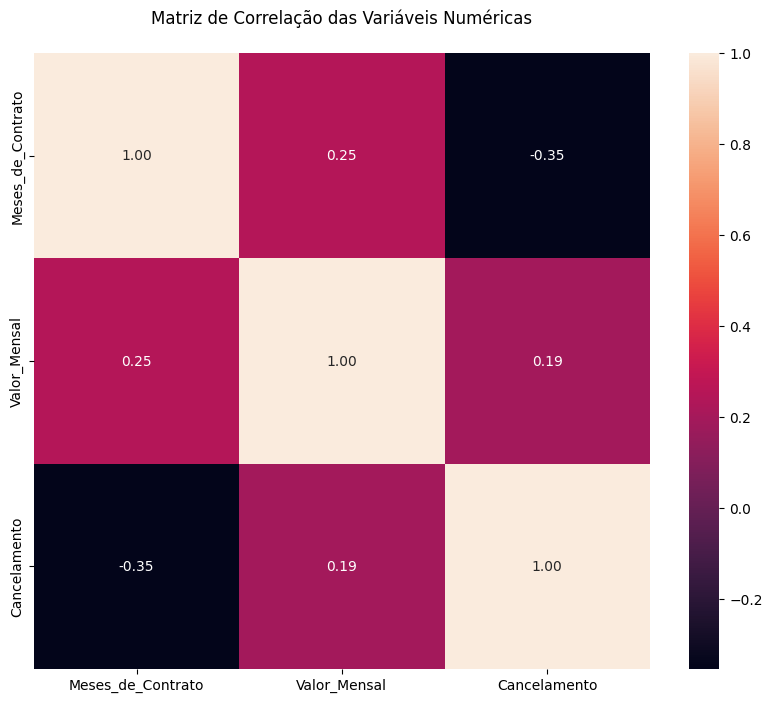

In [99]:
# Identificar as colunas numéricas automaticamente
colunas_numericas = dados.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Para garantir que a coluna alvo 'Cancelamento' esteja incluída
if 'Cancelamento' not in colunas_numericas:
    colunas_numericas.append('Cancelamento')

# Criar um DataFrame apenas com as colunas numéricas
dados_numericos = dados[colunas_numericas]


# Calcular matriz de correlação
corr = dados_numericos.corr()

# Visualizar matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", square=True)
plt.title('Matriz de Correlação das Variáveis Numéricas\n')
plt.show()


# Analisar correlação com evasão ---
corr_com_alvo = corr['Cancelamento'].drop('Cancelamento').sort_values(ascending=False)


In [100]:
# Dividir treino e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [101]:

# MODELO 1: Regressão Logística (com normalização)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Normalização apenas para o Modelo 1
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Treinar modelo com dados normalizados
modelo_log = LogisticRegression()
modelo_log.fit(X_train_norm, y_train)

# Previsões
y_pred_log = modelo_log.predict(X_test_norm)

# Avaliação
print(" REGRESSÃO LOGÍSTICA\n")

print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

 REGRESSÃO LOGÍSTICA

[[930 103]
 [179 195]]
              precision    recall  f1-score   support

       False       0.84      0.90      0.87      1033
        True       0.65      0.52      0.58       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [102]:
# MODELO 2: Random Forest

from sklearn.ensemble import RandomForestClassifier

# Treinar modelo com dados originais
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train, y_train)

# Previsões
y_pred_rf = modelo_rf.predict(X_test)

# Avaliação
print(" RANDOM FOREST\n")

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

 RANDOM FOREST

[[936  97]
 [199 175]]
              precision    recall  f1-score   support

       False       0.82      0.91      0.86      1033
        True       0.64      0.47      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



In [103]:

# MODELO 4: Árvore de Decisão (sem normalização)
from sklearn.tree import DecisionTreeClassifier

modelo_dt = DecisionTreeClassifier(random_state=42)
modelo_dt.fit(X_train, y_train)
y_pred_dt = modelo_dt.predict(X_test)

# Avaliação
print("ÁRVORE DE DECISÃO\n")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


ÁRVORE DE DECISÃO

[[833 200]
 [185 189]]
              precision    recall  f1-score   support

       False       0.82      0.81      0.81      1033
        True       0.49      0.51      0.50       374

    accuracy                           0.73      1407
   macro avg       0.65      0.66      0.65      1407
weighted avg       0.73      0.73      0.73      1407



In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Função para gerar métricas + matriz de confusão como string
def gerar_metricas(nome, modelo, X_test, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    cm_str = f"[[{cm[0][0]}, {cm[0][1]}], [{cm[1][0]}, {cm[1][1]}]]"

    return {
        'Modelo': nome,
        'Acurácia': accuracy_score(y_test, y_pred),
        'Precisão': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'Matriz de Confusão': cm_str
    }

# Coletar métricas de todos os modelos
resultados = [
    gerar_metricas("Regressão Logística", modelo_log, X_test_norm, y_test, y_pred_log),
    gerar_metricas("Random Forest", modelo_rf, X_test, y_test, y_pred_rf),
    gerar_metricas("Árvore de Decisão", modelo_dt, X_test, y_test, y_pred_dt)
]

# Criar DataFrame
df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values(by='F1-Score', ascending=False)

# Exibir a tabela
print("COMPARATIVO DE MODELOS\n")
print("-" * 26)
display(df_resultados.round(4))

COMPARATIVO DE MODELOS

--------------------------


,Modelo,Acurácia,Precisão,Recall,F1-Score,Matriz de Confusão
0,Regressão Logística,0.7996,0.6544,0.5214,0.5804,"[[930, 103], [179, 195]]"
1,Random Forest,0.7896,0.6434,0.4679,0.5418,"[[936, 97], [199, 175]]"
2,Árvore de Decisão,0.7264,0.4859,0.5053,0.4954,"[[833, 200], [185, 189]]"


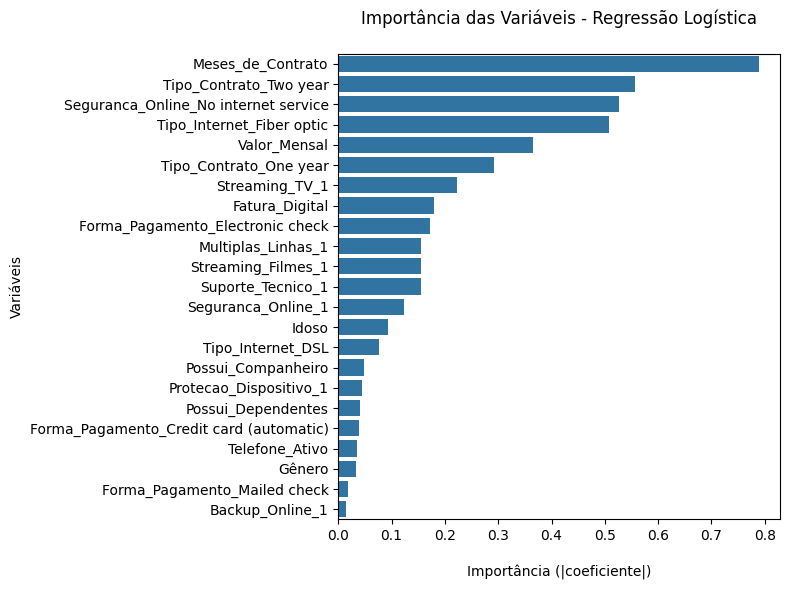

In [105]:
 #Extrair coeficientes do modelo treinado
coeficientes = modelo_log.coef_[0]

# Importância: valor absoluto dos coeficientes
importancias = np.abs(coeficientes)

# Criar DataFrame com variáveis e suas importâncias
df_importancias = pd.DataFrame({
    'Variável': X_train.columns,
    'Importância': importancias
}).sort_values(by='Importância', ascending=False)

# Plotar gráfico com cor única suave, sem legenda e sem warning
plt.figure(figsize=(8, 6))
sns.barplot(
    x='Importância',
    y='Variável',
    data=df_importancias,
    )
plt.title('Importância das Variáveis - Regressão Logística\n')
plt.xlabel('\nImportância (|coeficiente|)')
plt.ylabel('Variáveis')
plt.tight_layout()
plt.show()

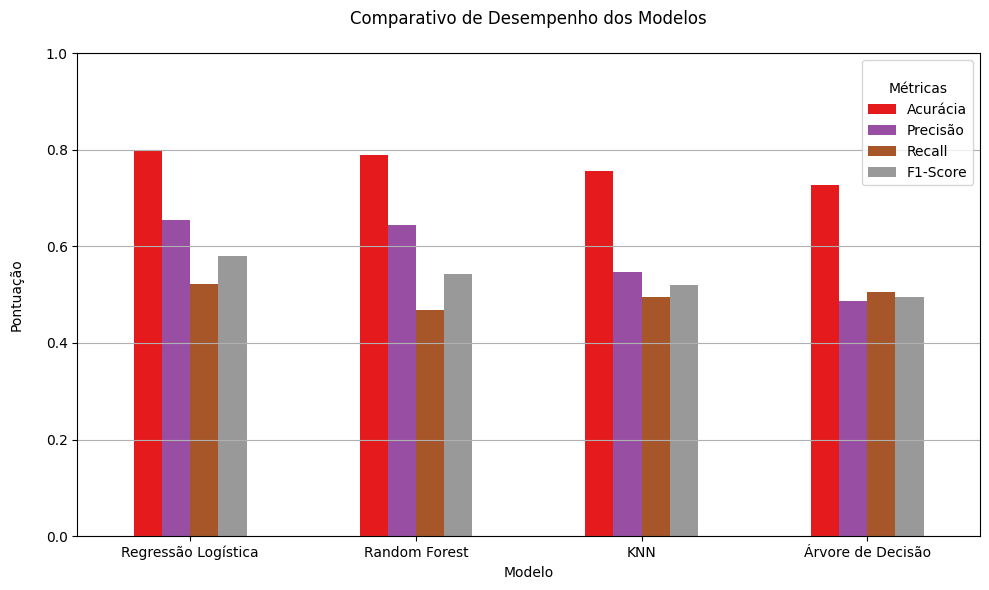

In [106]:
# Criar DataFrame com os dados fornecidos
dados_modelos = pd.DataFrame({
    'Modelo': ['Regressão Logística', 'Random Forest', 'KNN', 'Árvore de Decisão'],
    'Acurácia': [0.7996, 0.7896, 0.7569, 0.7264],
    'Precisão': [0.6544, 0.6434, 0.5473, 0.4859],
    'Recall': [0.5214, 0.4679, 0.4947, 0.5053],
    'F1-Score': [0.5804, 0.5418, 0.5197, 0.4954]
})

# Plotar gráfico de barras para cada métrica
dados_modelos.set_index('Modelo').plot(kind='bar', figsize=(10, 6), colormap='Set1')
plt.title('Comparativo de Desempenho dos Modelos\n')
plt.ylabel('Pontuação\n')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='\nMétricas')
plt.tight_layout()
plt.show()